In [1]:
# attempt to read in LH sims and plot data.
import pandas as pd
import matplotlib as mpl
import matplotlib.colors as cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import os

In [13]:
import os
import pandas as pd

# Define the directory containing the LH_X files
directory = "/home/jovyan/camels/proj1/CV_set/CV_outputs/LFs/IllustrisTNG"

# Get all files in the directory
files = os.listdir(directory)

# Filter out files that start with "LH_" and end with ".txt"
CV_X_files = [file for file in files if file.startswith("CV_") and file.endswith(".txt")]

# Initialize lists to store data
phia = []
phi_sigmaa = []
binsa = []
CV_X_values = []

# Iterate over LH_X files
for CV_X_file in CV_X_files:
    # Define the file path
    file_path = os.path.join(directory, CV_X_file)
    
    # Extract LH_X value from the file name (remove the ".txt" extension)
    CV_X = CV_X_file[:-4]
    
    # Initialize an empty dictionary to store variable names and their values
    variable_data = {}

    # Open the text file for reading
    with open(file_path, 'r') as file:
        # Initialize variables to store the current variable name and its values
        current_variable_name = None
        current_variable_values = []

        # Iterate over each line in the file
        for line in file:
            # Remove leading and trailing whitespace from the line
            line = line.strip()

            # Check if the line is empty
            if not line:
                continue

            # Check if the line is a variable name
            if line in ['phi', 'phi_sigma', 'hist', 'massBinLimits']:
                # If it's a new variable name, update the current variable name and reset the values list
                if current_variable_name is not None:
                    variable_data[current_variable_name] = current_variable_values
                    current_variable_values = []

                current_variable_name = line
            else:
                # If it's not a variable name, convert the value to float and append it to the values list
                current_variable_values.append(float(line))

        # Add the last variable data to the dictionary
        if current_variable_name is not None:
            variable_data[current_variable_name] = current_variable_values
        
        # Extract specific variables
        phi = variable_data.get('phi')
        phi_sigma = variable_data.get('phi_sigma')
        bins = variable_data.get('massBinLimits')

        phia.append(phi)
        phi_sigmaa.append(phi_sigma)
        binsa.append(bins)
        CV_X_values.append(CV_X)

# Create a DataFrame from the lists
df = pd.DataFrame({'CV_X': CV_X_values, 'phi': phia, 'phi_sigma': phi_sigmaa, 'bins': binsa})

# Display the DataFrame
df


,CV_X,phi,phi_sigma,bins
0,CV_0,"[0.0001229804089177522, 0.0003197490631861557,...","[3.888981997589799e-05, 6.270795048612386e-05,...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."
1,CV_1,"[0.00011068236802597697, 0.0004181333903203574...","[3.689412267532566e-05, 7.170928484078171e-05,...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."
2,CV_10,"[3.689412267532566e-05, 0.0003689412267532566,...","[2.1300831658114343e-05, 6.735914409546237e-05...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."
3,CV_11,"[0.00020906669516017874, 0.0001967686542684035...","[5.070612158495444e-05, 4.9192163567100876e-05...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."
4,CV_12,"[0.00015987453159307786, 0.0003074510222943804...","[4.434121702304844e-05, 6.14902044588761e-05, ...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."
5,CV_13,"[0.0001229804089177522, 0.00030745102229438046...","[3.888981997589799e-05, 6.14902044588761e-05, ...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."
6,CV_14,"[0.00013527844980952742, 0.0002213647360519539...","[4.078798729446612e-05, 5.217616865930228e-05,...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."
7,CV_15,"[3.689412267532566e-05, 0.00030745102229438046...","[2.1300831658114343e-05, 6.14902044588761e-05,...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."
8,CV_16,"[0.0, 0.0002582588587272796, 0.000405835349428...","[0.0, 5.635670328622216e-05, 7.064686633248915...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."
9,CV_17,"[3.689412267532566e-05, 3.689412267532566e-05,...","[2.1300831658114343e-05, 2.1300831658114343e-0...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."


print(df['phi'][2])

phi = df['phi'][2]
phi_log = np.log(phi)
phi_log

phi_log = np.log(phi)

In [14]:
#df['phi_log'] = df['phi'].apply(lambda x: np.log(x) if all(i > 0 for i in x) else np.nan)
#df

In [15]:
# Generate the list of expected filenames
expected_files = [f'CV_{i}' for i in range(27)]

# Extract the filenames that are actually present in the DataFrame
present_files = df['CV_X'].tolist()

# Find the missing filenames
missing_files = set(expected_files) - set(present_files)

# If you want to print the missing files
print("Missing files:")
for file in sorted(missing_files):
    print(file)

Missing files:


In [5]:
df['CV_X'].unique()

array([], dtype=float64)

import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data

# Plot the luminosity function for each LH_X value
for i, row in df.iterrows():
    plt.errorbar(row['bins'], row['phi'], yerr=row['phi_sigma'], fmt='o', label=row['LH_X'])
    #plt.plot(row['bins'], row['phi'], label=row['LH_X'])

plt.xlabel('Mag [AB]')
plt.ylabel('$\Phi [Mpc^{-3} mag^{-1}]$')
plt.yscale('log')
plt.legend()  # Add legend

plt.title('Luminosity Function z=0.465')
plt.grid(True)

# Set the x-axis and y-axis limits
plt.xlim(-22, -17)  # Replace xmin and xmax with your desired limits for the x-axis
plt.ylim(1e-5,0)  
plt.show()


# Python script to plot magi.qdp

import matplotlib.pyplot as plt
from matplotlib import rc

# Open the .qdp file
def get_arnouts(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Initialize lists to store x and y values
    arn_x = []
    arn_y = []

    # Read data between 'no no no' lines
    start_index = lines.index(' no no no no\n') + 1
    end_index = lines.index(' no no no no\n', start_index)

    for line in lines[start_index:end_index]:
        # Split the line and extract x and y values
        parts = line.strip().split()
        arn_x.append(float(parts[0]))
        arn_y.append(float(parts[1]))

    return arn_x, arn_y


arn_x, arn_y = get_arnouts('/home/jovyan/camels/proj1/bin/play/synth-lums/1P_parameters/1P_p4/outfiles/magi_1P_p4_1.qdp')


In [6]:
#print(arn_x)

In [7]:
#print(arn_y)

In [16]:
massBinLimits = np.arange(-22, -16, 0.5)


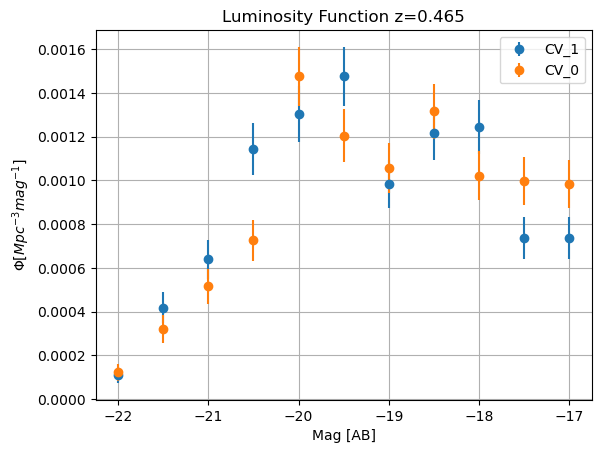

In [17]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Filter for CV_X == 103
specific_row = df[df['CV_X'] == 'CV_1']
specific_row2 = df[df['CV_X'] == 'CV_0']

# Check if the specific row is found
if not specific_row.empty:
    row = specific_row.iloc[0]
    row2 = specific_row2.iloc[0]
    plt.errorbar(massBinLimits[:-1], row['phi'], yerr=row['phi_sigma'], fmt='o', label=f'{row["CV_X"]}')
    plt.errorbar(massBinLimits[:-1], row2['phi'], yerr=row2['phi_sigma'], fmt='o', label=f'{row2["CV_X"]}')
    #plt.plot(arn_x, arn_y,color='black', label='Arnouts et al 2005')

    # Set x and y limits
    #plt.xlim(-22.5, -17.7)
    #plt.ylim(-7, -1)
    plt.xlabel('Mag [AB]')
    plt.ylabel('$\Phi [Mpc^{-3} mag^{-1}]$')
    #plt.yscale('log')
    plt.legend()  # Add legend

    plt.title('Luminosity Function z=0.465')
    plt.grid(True)

    # Set the x-axis and y-axis limits
    #plt.xlim(-22, -17)  # Replace xmin and xmax with your desired limits for the x-axis
    #plt.ylim(1e-5, 0)  
    plt.show()
else:
    print("No data found for CV_X == 103")


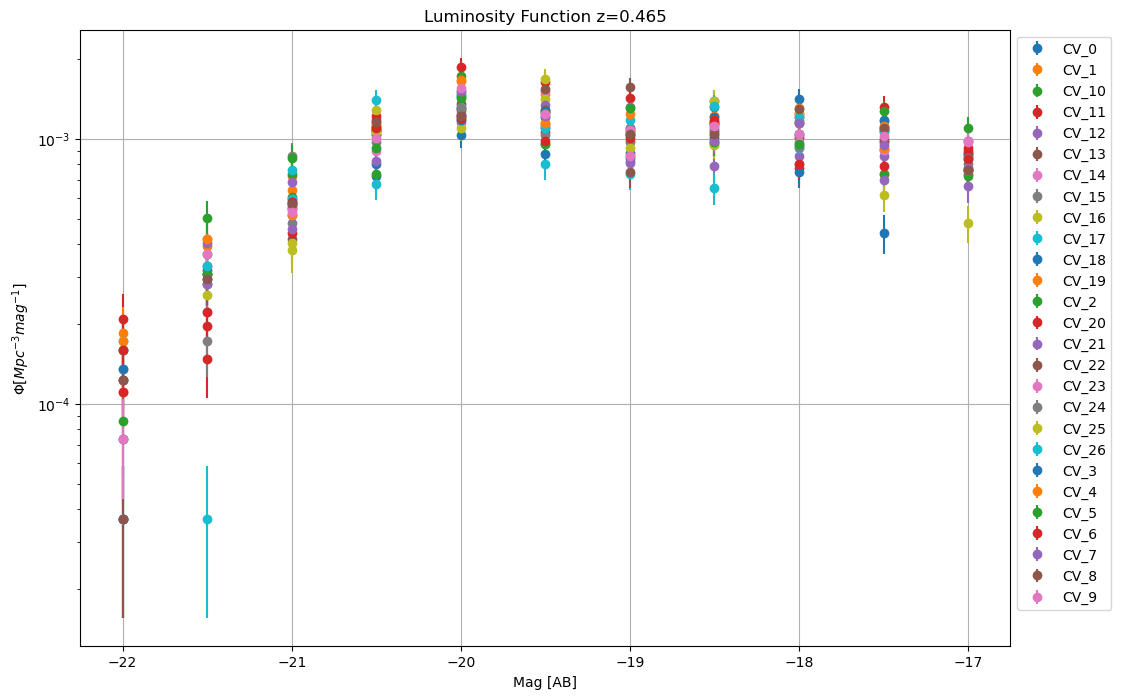

In [18]:
# Initialize the plot
plt.figure(figsize=(12, 8))

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    phi = row['phi']
    phi_sigma = row['phi_sigma']

    # Plot each row's data with error bars
    plt.errorbar(massBinLimits[:-1], phi, yerr=phi_sigma, fmt='o', label=f'{row["CV_X"]}')

# Set plot labels and scale
plt.xlabel('Mag [AB]')
plt.ylabel('$\Phi [Mpc^{-3} mag^{-1}]$')
plt.yscale('log')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Change (1, 1) as needed for positioning

plt.title('Luminosity Function z=0.465')
plt.grid(True)

# Set the x-axis and y-axis limits
#plt.xlim(-22, -16)  # Replace xmin and xmax with your desired limits for the x-axis
#plt.ylim(1e-5, None)  # Set the lower limit for the y-axis

# Show the plot
plt.show()


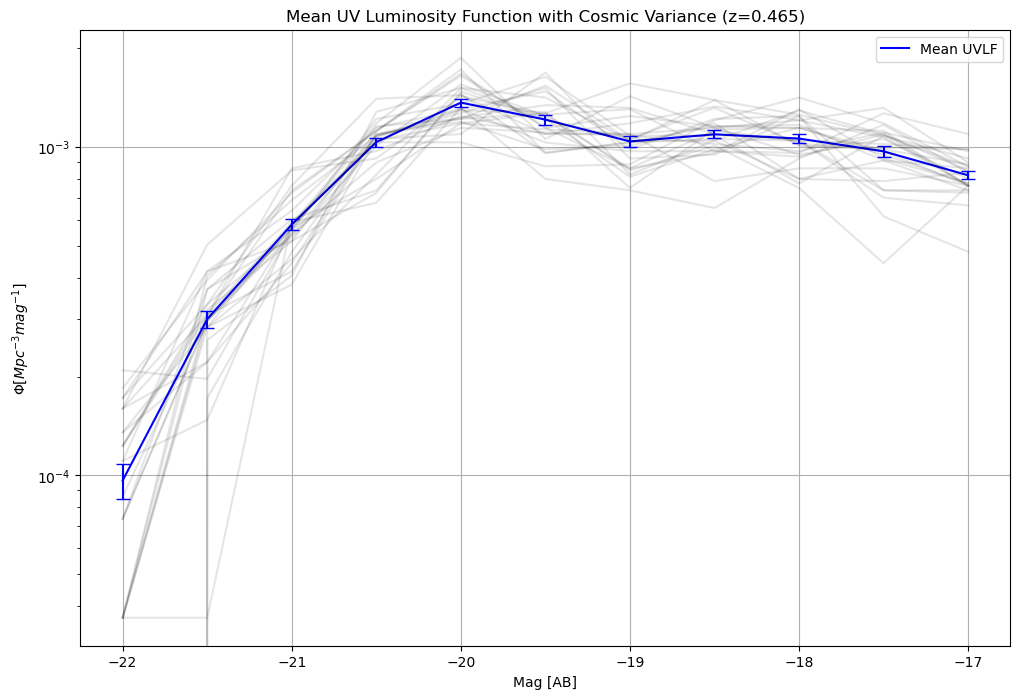

In [21]:
# Converts the lists in your DataFrame to NumPy arrays for efficient calculation.
#Calculates the mean UVLF across all simulations.
#Computes the 16th and 84th percentiles to show the range of variation due to cosmic variance.
#Plots the mean UVLF as a blue line.
#Shows the 16th-84th percentile range as a shaded blue area, representing the cosmic variance.
#Plots each individual simulation as a faint black line.
#Adds error bars to the mean line, showing the uncertainty in the mean itself.

#This visualization provides several insights:

#The overall trend of the UVLF (mean blue line).
#The range of variation due to cosmic variance (shaded area).
#How individual simulations (faint black lines) deviate from the mean.
#The uncertainty in the mean UVLF (error bars).

# Convert lists to numpy arrays for easier calculation
phi_arrays = np.array(df['phi'].tolist())
phi_sigma_arrays = np.array(df['phi_sigma'].tolist())

# Calculate mean and standard deviation across all simulations
mean_phi = np.mean(phi_arrays, axis=0)
std_phi = np.std(phi_arrays, axis=0)

# Calculate percentiles
#lower_percentile = np.percentile(phi_arrays, 16, axis=0)
#upper_percentile = np.percentile(phi_arrays, 84, axis=0)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot mean UVLF
plt.plot(massBinLimits[:-1], mean_phi, 'b-', label='Mean UVLF')

# Plot shaded region for 16th-84th percentile range
#plt.fill_between(massBinLimits[:-1], lower_percentile, upper_percentile, 
 #                alpha=0.3, color='b', label='16th-84th Percentile Range')

# Plot individual simulations with low opacity
for phi in phi_arrays:
    plt.plot(massBinLimits[:-1], phi, 'k-', alpha=0.1)

# Set plot labels and scale
plt.xlabel('Mag [AB]')
plt.ylabel('$\Phi [Mpc^{-3} mag^{-1}]$')
plt.yscale('log')
plt.title('Mean UV Luminosity Function with Cosmic Variance (z=0.465)')
plt.legend()
plt.grid(True)

# Optional: Add error bars to mean line
plt.errorbar(massBinLimits[:-1], mean_phi, yerr=std_phi/np.sqrt(len(df)), 
             fmt='none', ecolor='b', capsize=5, label='Mean Uncertainty')

# Adjust plot limits if needed
# plt.xlim(-22, -16)
# plt.ylim(1e-5, 1e-1)
plt.savefig("/home/jovyan/camels/proj1/CV_set/CV_outputs/plots/IllustrisTNG/UVLF_Mean_CV.png", dpi=300, bbox_inches='tight')


plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming df is your DataFrame with all 27 simulations
# and massBinLimits is already defined

# Create a new DataFrame for the heatmap
heatmap_data = pd.DataFrame(df['phi'].tolist(), index=df.index)

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': '$\Phi [Mpc^{-3} mag^{-1}]$'})

# Set labels and title
plt.xlabel('Magnitude Bin Index')
plt.ylabel('Simulation Index')
plt.title('UV Luminosity Function Heatmap (z=0.465)')

# Optionally, add magnitude values to x-axis
mag_ticks = np.arange(0, len(massBinLimits)-1, 5)  # Adjust step size as needed
plt.xticks(mag_ticks, [f'{massBinLimits[i]:.1f}' for i in mag_ticks], rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

# Optional: Plot log of phi values for better contrast
plt.figure(figsize=(15, 10))
sns.heatmap(np.log10(heatmap_data), cmap='viridis', cbar_kws={'label': 'log$_{10}(\Phi) [Mpc^{-3} mag^{-1}]$'})

plt.xlabel('Magnitude Bin Index')
plt.ylabel('Simulation Index')
plt.title('Log UV Luminosity Function Heatmap (z=0.465)')

plt.xticks(mag_ticks, [f'{massBinLimits[i]:.1f}' for i in mag_ticks], rotation=45)

plt.tight_layout()
plt.show()

plt.savefig("/home/jovyan/camels/proj1/CV_set/CV_outputs/plots/IllustrisTNG/UVLF_HEATMAPS.png", dpi=300, bbox_inches='tight')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df is your DataFrame with all 27 simulations
# We'll use the length of a single phi list to determine the number of magnitude bins
num_mag_bins = len(df['phi'].iloc[0])

# Create magnitude bin centers (assuming equal width bins)
mag_bin_centers = np.linspace(massBinLimits[0], massBinLimits[-1], num_mag_bins)

# Calculate percentiles across all simulations
median = np.median(np.vstack(df['phi']), axis=0)
percentile_16 = np.percentile(np.vstack(df['phi']), 16, axis=0)
percentile_84 = np.percentile(np.vstack(df['phi']), 84, axis=0)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot individual simulation lines with low opacity
for index, row in df.iterrows():
    plt.plot(mag_bin_centers, row['phi'], 'k-', alpha=0.1, zorder=1)

# Plot median and percentiles
plt.plot(mag_bin_centers, median, 'b-', label='Median UVLF', linewidth=2, zorder=3)
#plt.fill_between(mag_bin_centers, percentile_16, percentile_84, 
 #                alpha=0.3, color='b', label='16th-84th Percentile Range', zorder=2)

# Set plot labels and scale
plt.xlabel('Mag [AB]')
plt.ylabel('$\Phi [Mpc^{-3} mag^{-1}]$')
plt.yscale('log')
#plt.title('UV Luminosity Function with Cosmic Variance (z=0.465)')
plt.legend()
plt.grid(True)

# Adjust axis limits if needed
# plt.xlim(mag_bin_centers[0], mag_bin_centers[-1])
# plt.ylim(1e-5, 1e-1)
plt.savefig("/home/jovyan/camels/proj1/CV_set/CV_outputs/plots/IllustrisTNG/UVLF_Median_16th18thPercentile.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df is your DataFrame with all 27 simulations
# We'll use the length of a single phi list to determine the number of magnitude bins
num_mag_bins = len(df['phi'].iloc[0])

# Create magnitude bin centers (assuming equal width bins)
mag_bin_centers = np.linspace(massBinLimits[0], massBinLimits[-1], num_mag_bins)

# Calculate percentiles across all simulations
median = np.median(np.vstack(df['phi']), axis=0)
percentile_16 = np.percentile(np.vstack(df['phi']), 16, axis=0)
percentile_84 = np.percentile(np.vstack(df['phi']), 84, axis=0)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot individual simulation lines with low opacity
for index, row in df.iterrows():
    plt.plot(mag_bin_centers, row['phi'], 'k-', alpha=0.1, zorder=1)

# Plot median and percentiles
plt.plot(mag_bin_centers, median, 'b-', label='Median UVLF', linewidth=2, zorder=3)
#plt.fill_between(mag_bin_centers, percentile_16, percentile_84, 
 #                alpha=0.3, color='b', label='16th-84th Percentile Range', zorder=2)

# Set plot labels and scale
plt.xlabel('Mag [AB]')
plt.ylabel('$\Phi [Mpc^{-3} mag^{-1}]$')
plt.yscale('log')
#plt.title('UV Luminosity Function with Cosmic Variance (z=0.465)')
plt.legend()
plt.grid(True)

# Adjust axis limits if needed
# plt.xlim(mag_bin_centers[0], mag_bin_centers[-1])
# plt.ylim(1e-5, 1e-1)
plt.savefig("/home/jovyan/camels/proj1/CV_set/CV_outputs/plots/SIMBA/UVLF_Median_16th18thPercentile.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Assuming df is your DataFrame with all 27 simulations
num_mag_bins = len(df['phi'].iloc[0])
num_simulations = len(df)

# Create magnitude bin centers (assuming equal width bins)
mag_bin_centers = np.linspace(massBinLimits[0], massBinLimits[-1], num_mag_bins)

# Stack all phi values
phi_values = np.vstack(df['phi'])

# Calculate median and percentiles
median = np.median(phi_values, axis=0)
percentile_16 = np.percentile(phi_values, 16, axis=0)
percentile_84 = np.percentile(phi_values, 84, axis=0)

# Calculate standard error of the median using bootstrapping
n_bootstrap = 1000
bootstrap_medians = np.zeros((n_bootstrap, num_mag_bins))
for i in range(n_bootstrap):
    bootstrap_sample = phi_values[np.random.randint(0, num_simulations, size=num_simulations)]
    bootstrap_medians[i] = np.median(bootstrap_sample, axis=0)
median_std_error = np.std(bootstrap_medians, axis=0)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot individual simulation lines with low opacity
for index, row in df.iterrows():
    plt.plot(mag_bin_centers, row['phi'], 'k-', alpha=0.1, zorder=1)

# Plot median with error bars
plt.errorbar(mag_bin_centers, median, yerr=median_std_error, fmt='b-', 
             label='Median UVLF', linewidth=2, zorder=3, capsize=5)

# Plot percentile range
#plt.fill_between(mag_bin_centers, percentile_16, percentile_84, 
 #                alpha=0.3, color='b', label='16th-84th Percentile Range', zorder=2)

# Set plot labels and scale
plt.xlabel('Mag [AB]')
plt.ylabel('$\Phi [Mpc^{-3} mag^{-1}]$')
plt.yscale('log')
#plt.title('UV Luminosity Function with Cosmic Variance and Median Uncertainty (z=0.465)')
plt.legend()
plt.grid(True)

# Adjust axis limits if needed
# plt.xlim(mag_bin_centers[0], mag_bin_centers[-1])
# plt.ylim(1e-5, 1e-1)
plt.savefig("/home/jovyan/camels/proj1/CV_set/CV_outputs/plots/IllustrisTNG/UVLF_Median_16th18thPercentile_w_uncertainties.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Assuming df is your DataFrame with all 27 simulations
num_mag_bins = len(df['phi'].iloc[0])

# Create magnitude bin centers (assuming equal width bins)
mag_bin_centers = np.linspace(massBinLimits[0], massBinLimits[-1], num_mag_bins)

# Stack all phi values
phi_values = np.vstack(df['phi'])

# Calculate median
median = np.median(phi_values, axis=0)

# Calculate relative deviations
relative_deviations = (phi_values - median) / median

# Create the plot
plt.figure(figsize=(12, 8))

# Plot relative deviations
for i in range(len(df)):
    plt.plot(mag_bin_centers, relative_deviations[i], alpha=0.5)

# Plot median line (which will be at y=0)
plt.axhline(y=0, color='r', linestyle='--', label='Median')

# Calculate and plot 16th and 84th percentiles of relative deviations
percentile_16 = np.percentile(relative_deviations, 16, axis=0)
percentile_84 = np.percentile(relative_deviations, 84, axis=0)
#plt.fill_between(mag_bin_centers, percentile_16, percentile_84, 
 #                alpha=0.3, color='gray', label='16th-84th Percentile Range')

# Set plot labels and scale
plt.xlabel('Mag [AB]')
plt.ylabel('Relative Deviation from Median $(\Phi - \Phi_{median}) / \Phi_{median}$')
plt.title('Relative Deviations in UV Luminosity Function (z=0.465)')
plt.legend()
plt.grid(True)

# Adjust y-axis to be symmetric around 0
y_max = max(abs(plt.ylim()[0]), abs(plt.ylim()[1]))
plt.ylim(-y_max, y_max)
plt.savefig("/home/jovyan/camels/proj1/CV_set/CV_outputs/plots/IllustrisTNG/RelativeDeviations_16th18thPercentile.png", dpi=300, bbox_inches='tight')

plt.show()

# Optional: Create a boxplot of relative deviations
plt.figure(figsize=(12, 8))
sns.boxplot(data=relative_deviations.T)
plt.xlabel('Magnitude Bin Index')
plt.ylabel('Relative Deviation from Median')
plt.title('Distribution of Relative Deviations Across Magnitude Bins')
plt.xticks(range(0, num_mag_bins, 2), [f'{mag_bin_centers[i]:.2f}' for i in range(0, num_mag_bins, 2)], rotation=45)
plt.show()
plt.savefig("/home/jovyan/camels/proj1/CV_set/CV_outputs/plots/IllustrisTNG/RelativeDeviations_BOXPLOT16th18thPercentile.png", dpi=300, bbox_inches='tight')
